In [15]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pytz import timezone
from pysolar.solar import get_altitude, get_azimuth
import numpy as np

In [16]:
# Función para obtener la posición del sol
def getSolarPosition(latitude, longitude, date):
    az = get_azimuth(latitude, longitude, date)
    el = get_altitude(latitude, longitude, date)
    return az, el

In [17]:
# Función para calcular los ángulos de control
def calculateControlAngles(azimuth, elevation):
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)
    pitch = elevation
    roll = azimuth_rad
    return roll, pitch

In [18]:
# Función para simular la trayectoria solar durante un día
def simulateDay(latitude, longitude, date, interval_minutes):
    times = []
    elevations = []
    azimuths = []
    rolls = []
    pitches = []

    current_time = date.replace(hour=0, minute=0, second=0, microsecond=0)
    end_time = date.replace(hour=23, minute=59, second=59, microsecond=0)
    while current_time <= end_time:
        azimuth, elevation = getSolarPosition(latitude, longitude, current_time)
        roll, pitch = calculateControlAngles(azimuth, elevation)

        times.append(current_time)
        elevations.append(elevation)
        azimuths.append(azimuth)
        rolls.append(np.degrees(roll))
        pitches.append(pitch)

        current_time += timedelta(minutes=interval_minutes)

    return times, elevations, azimuths, rolls, pitches

In [19]:
# Función para graficar la simulación
def plotSimulation(times, elevations, azimuths, rolls, pitches, frame):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(times, elevations, 'r-', label="Elevación Solar (θ)")
    ax1.set_xlabel("Hora")
    ax1.set_ylabel("Ángulo de Elevación (°)", color='r')

    ax1.plot(times, pitches, '--', label="Pitch (ψ)")
    ax1.tick_params(axis='y', labelcolor='r')

    ax2 = ax1.twinx()
    ax2.plot(times, rolls, 'g-', label="Roll (φ)")
    ax2.set_ylabel("Ángulo de Roll (°)", color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    fig.tight_layout()
    plt.title("Simulación de Trayectoria Solar y Orientación del Panel")
    fig.autofmt_xdate()
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Crear el canvas para incluir en Tkinter
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

In [20]:
# Función para ejecutar la simulación al presionar el botón
def run_simulation():
    try:
        latitude = float(lat_entry.get())
        longitude = float(lon_entry.get())
        date = datetime.strptime(date_entry.get(), "%Y-%m-%d").replace(tzinfo=timezone("America/Guayaquil"))
        interval = int(interval_entry.get())

        times, elevations, azimuths, rolls, pitches = simulateDay(latitude, longitude, date, interval)

        for widget in graph_frame.winfo_children():
            widget.destroy()  # Eliminar gráficos previos

        plotSimulation(times, elevations, azimuths, rolls, pitches, graph_frame)

    except ValueError as e:
        messagebox.showerror("Error", f"Entrada no válida")

In [21]:
# Configuración de la ventana principal
root = tk.Tk()
root.title("Simulación de Seguidor Solar")
root.configure(bg='#D2B48C')  # Fondo café claro

In [22]:
# Frame para la entrada de datos
input_frame = tk.Frame(root, bg='#D2B48C')
input_frame.pack(side=tk.TOP, fill=tk.X, padx=5, pady=5)

tk.Label(input_frame,bg='#D2B48C', text="Latitud:").grid(row=0, column=0, padx=5, pady=5)
lat_entry = tk.Entry(input_frame)
lat_entry.grid(row=0, column=1, padx=5, pady=5)
lat_entry.insert(0, "-0.2105367")  # Valor por defecto

tk.Label(input_frame,bg='#D2B48C', text="Longitud:").grid(row=1, column=0, padx=5, pady=5)
lon_entry = tk.Entry(input_frame)
lon_entry.grid(row=1, column=1, padx=5, pady=5)
lon_entry.insert(0, "-78.491614")  # Valor por defecto

tk.Label(input_frame,bg='#D2B48C', text="Fecha (YYYY-MM-DD):").grid(row=2, column=0, padx=5, pady=5)
date_entry = tk.Entry(input_frame)
date_entry.grid(row=2, column=1, padx=5, pady=5)
date_entry.insert(0, datetime.now().strftime("%Y-%m-%d"))  # Fecha actual por defecto

tk.Label(input_frame,bg='#D2B48C', text="Intervalo (min):").grid(row=3, column=0, padx=5, pady=5)
interval_entry = tk.Entry(input_frame)
interval_entry.grid(row=3, column=1, padx=5, pady=5)
interval_entry.insert(0, "10")  # Intervalo por defecto

simulate_button = tk.Button(input_frame, text="Ejecutar Simulación", command=run_simulation)
simulate_button.grid(row=4, columnspan=2, pady=10)


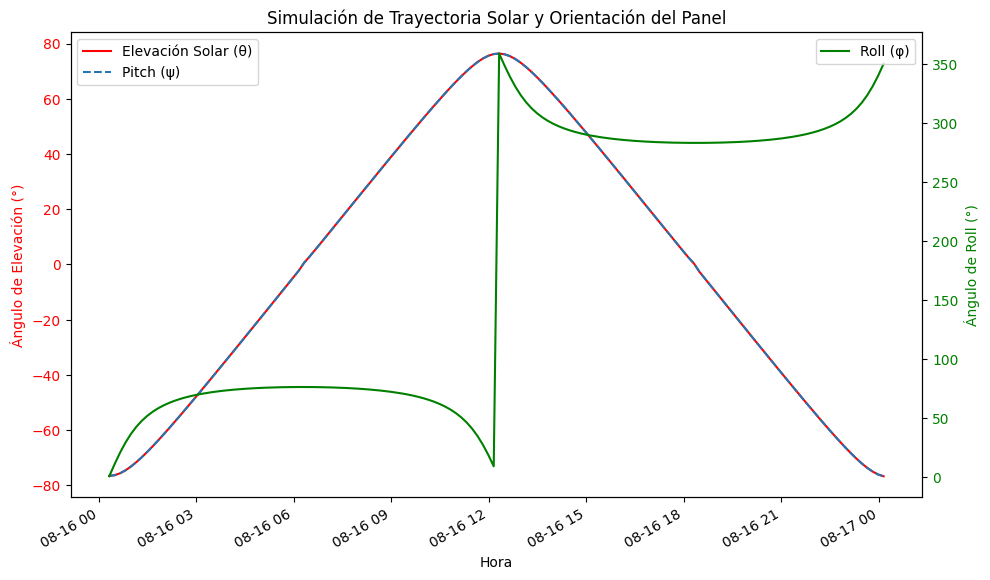

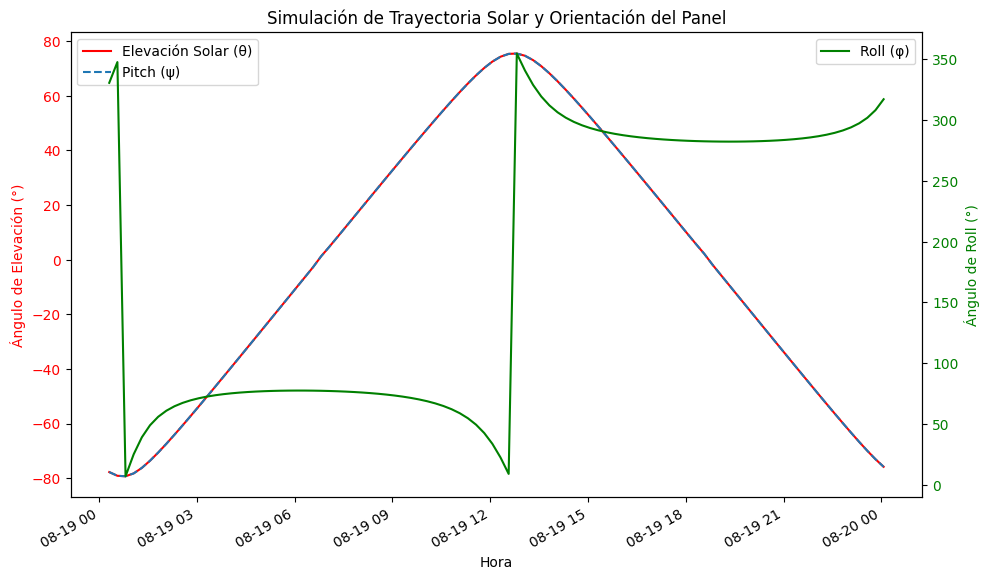

In [23]:
# Frame para el gráfico
graph_frame = tk.Frame(root, bg='#D2B48C')
graph_frame = tk.Frame(root)
graph_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True, padx=5, pady=5)

root.mainloop()